<a href="https://colab.research.google.com/github/RiddhimGupta/Project/blob/master/Brain_Tumor_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Augmentation**

## **About the data:**

The dataset contains 2 folders: Yes and No which contains 253 Brain MRI Images. The folder YES contains 155 Brain MRI Images that are tumorous and the folder NO contains 98 Brain MRI Images that are non-tumorous.

Since this is a small dataset, We have used data augmentation in order to create more images.

Also, we could solve the data imbalance issue (since 61% of the data belongs to the tumorous class) using data augmentation.

## **Import Necessary Modules**

In [1]:
#Delete a pre uploaded folder
! rm -rf brats
! rm -rf data
! rm -rf logs
! rm -rf models
! rm -rf /root/.kaggle
! rm -rf brats
#brats=folder name

In [2]:
#Download kaggle data in colab
#https://www.kaggle.com/general/74235
! pip install -q kaggle
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 40% 6.00M/15.1M [00:00<00:00, 61.3MB/s]
100% 15.1M/15.1M [00:00<00:00, 74.1MB/s]


In [5]:
! unzip brain-mri-images-for-brain-tumor-detection.zip -d brats
! mkdir brats/augmented_data
! mkdir brats/augmented_data/yes
! mkdir brats/augmented_data/no
! rm -rf brats/brain_tumor_dataset

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brats/brain_tumor_dataset/no/1 no.jpeg  
  inflating: brats/brain_tumor_dataset/no/10 no.jpg  
  inflating: brats/brain_tumor_dataset/no/11 no.jpg  
  inflating: brats/brain_tumor_dataset/no/12 no.jpg  
  inflating: brats/brain_tumor_dataset/no/13 no.jpg  
  inflating: brats/brain_tumor_dataset/no/14 no.jpg  
  inflating: brats/brain_tumor_dataset/no/15 no.jpg  
  inflating: brats/brain_tumor_dataset/no/17 no.jpg  
  inflating: brats/brain_tumor_dataset/no/18 no.jpg  
  inflating: brats/brain_tumor_dataset/no/19 no.jpg  
  inflating: brats/brain_tumor_dataset/no/2 no.jpeg  
  inflating: brats/brain_tumor_dataset/no/20 no.jpg  
  inflating: brats/brain_tumor_dataset/no/21 no.jpg  
  inflating: brats/brain_tumor_dataset/no/22 no.jpg  
  inflating: brats/brain_tumor_dataset/no/23 no.jpg  
  inflating: brats/brain_tumor_dataset/no/24 no.jpg  
  inflating: brats/brain_tumor_dataset/no/25 no.jpg  
  inflating: brats/brain_

## **Import Necessary Modules**

In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import imutils
import matplotlib.pyplot as plt
from os import listdir
import time    

%matplotlib inline

In [7]:

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

In [8]:
def augment_data(file_dir, n_generated_samples, save_to_dir):
    """
    Arguments:
        file_dir: A string representing the directory where images that we want to augment are found.
        n_generated_samples: A string representing the number of generated samples using the given image.
        save_to_dir: A string representing the directory in which the generated images will be saved.
    """
    
    #from keras.preprocessing.image import ImageDataGenerator
    #from os import listdir
    
    data_gen = ImageDataGenerator(rotation_range=10, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  shear_range=0.1, 
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True, 
                                  vertical_flip=True, 
                                  fill_mode='nearest'
                                 )

    
    for filename in listdir(file_dir):
        # load the image
        image = cv2.imread(file_dir + '/' + filename)
        # reshape the image
        image = image.reshape((1,)+image.shape)
        # prefix of the names for the generated sampels.
        save_prefix = 'aug_' + filename[:-4]
        # generate 'n_generated_samples' sample images
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, 
                                           save_prefix=save_prefix, save_format='jpg'):
            i += 1
            if i > n_generated_samples:
                break

Remember that 61% of the data (155 images) are tumorous. And, 39% of the data (98 images) are non-tumorous.

So, in order to balance the data we can generate 9 new images for every image that belongs to 'NO' class and 6 images for every image that belongs the 'YES' class.

In [9]:
start_time = time.time()

augmented_data_path = 'brats/augmented_data/'

# augment data for the examples with label equal to 'yes' representing tumurous examples
augment_data(file_dir='brats/yes', n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
# augment data for the examples with label equal to 'no' representing non-tumurous examples
augment_data(file_dir='brats/no', n_generated_samples=9, save_to_dir=augmented_data_path+'no')

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Elapsed time: 0:2:0.4


Let's see how many tumorous and non-tumorous examples after performing data augmentation:

In [10]:
def data_summary(main_path):
    
    yes_path = main_path+'yes'
    no_path = main_path+'no'
        
    # number of files (images) that are in the the folder named 'yes' that represent tumorous (positive) examples
    m_pos = len(listdir(yes_path))
    # number of files (images) that are in the the folder named 'no' that represent non-tumorous (negative) examples
    m_neg = len(listdir(no_path))
    # number of all examples
    m = (m_pos+m_neg)
    
    pos_prec = (m_pos* 100.0)/ m
    neg_prec = (m_neg* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {m_pos}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {m_neg}")

In [11]:
data_summary(augmented_data_path)

Number of examples: 2065
Percentage of positive examples: 52.54237288135593%, number of pos examples: 1085
Percentage of negative examples: 47.45762711864407%, number of neg examples: 980


That's it for this notebook. Now, we can use the augmented data to train our convolutional neural network.

# **Brain Tumor Detection Using a Convolutional Neural Network**

## **About the Brain MRI Images dataset:**

The dataset contains 2 folders: YES and NO which contains 253 Brain MRI Images. The folder YES contains 155 Brain MRI Images that are tumorous and the folder NO contains 98 Brain MRI Images that are non-tumorous.

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline

## **Data Preparation & Preprocessing**

In order to crop the part that contains only the brain of the image, We used a cropping technique to find the extreme top, bottom, left and right points of the brain.

In [13]:
def crop_brain_contour(image, plot=False):
    
    #import imutils
    #import cv2
    #from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

In order to better understand what it's doing, let's grab an image from the dataset and apply this cropping function to see the result:

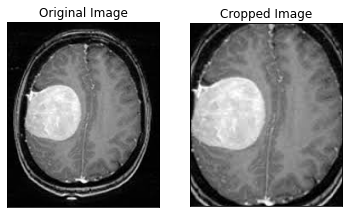

In [14]:
ex_img = cv2.imread('brats/yes/Y1.jpg')
ex_new_img = crop_brain_contour(ex_img, True)

## **Load up the data:**

The following function takes two arguments, the first one is a list of directory paths for the folders 'YES' and 'NO' that contain the image data and the second argument is the image size, and for every image in both directories and does the following:

1. Read the image.
2. Crop the part of the image representing only the brain.
3. Resize the image (because the images in the dataset come in different sizes (meaning width, height and # of channels). So, we want all of our images to be (240, 240, 3) to feed it as an input to the neural network.
4. Apply normalization because we want pixel values to be scaled to the range 0-1.
5. Append the image to X and its label to y.

After that, Shuffle X and y, because the data is ordered (meaning the arrays contains the first part belonging to one class and the second part belonging to the other class, and we don't want that).

Finally, Return X and y

In [15]:
def load_data(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            # load the image
            image = cv2.imread(directory + '/' + filename)
            # crop the brain and ignore the unnecessary rest part of the image
            image = crop_brain_contour(image, plot=False)
            # resize image
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

**Note:** the augmented data directory contains not only the new generated images but also the original images.

In [16]:
augmented_data_path = 'brats/augmented_data/'
augmented_yes = augmented_data_path+'yes'
augmented_no = augmented_data_path+'no'

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X, y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 2065
X shape is: (2065, 240, 240, 3)
y shape is: (2065, 1)


As we see, we have 2065 images. Each images has a shape of (240, 240, 3)=(image_width, image_height, number_of_channels)

## **Plot sample images:**

In [17]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for both values of y (labels).
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    for label in [0,1]:
        # grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1 # current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

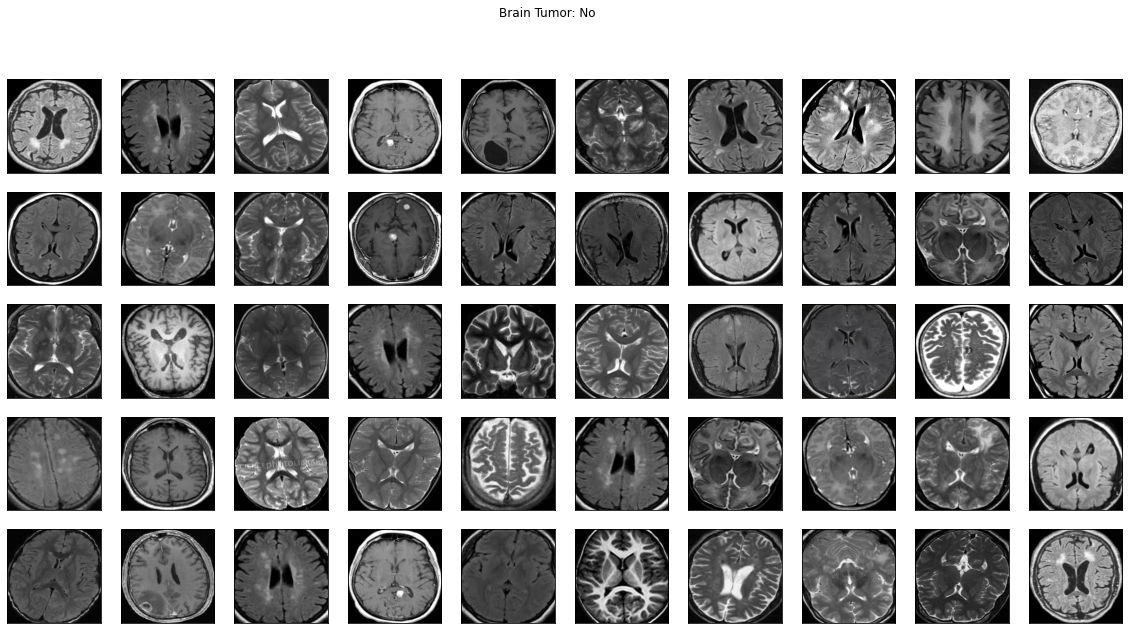

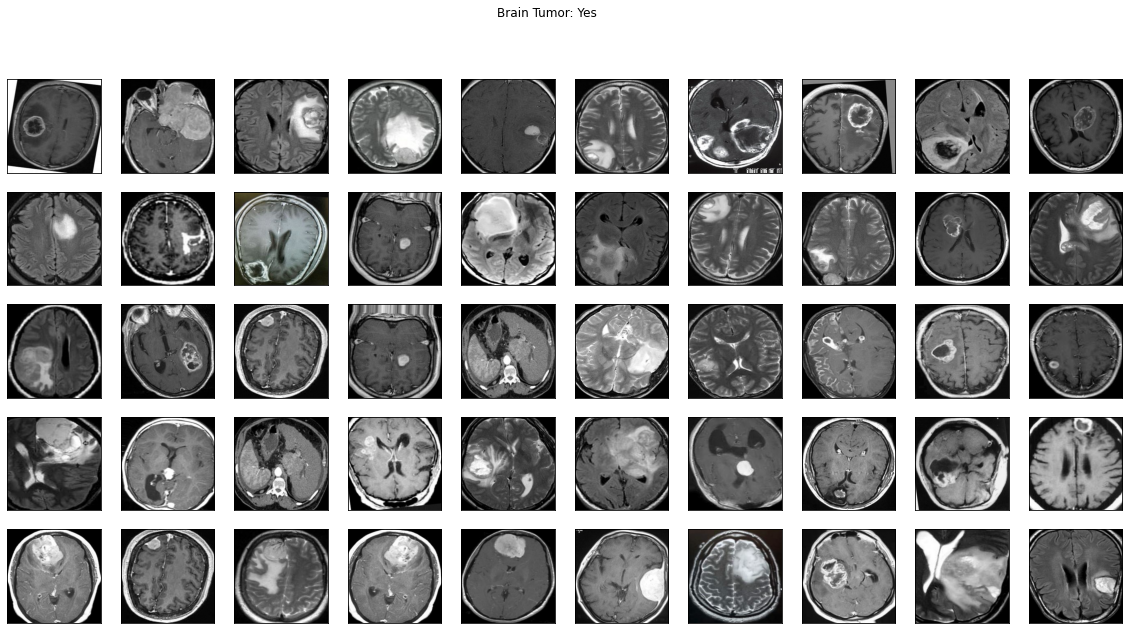

In [18]:
plot_sample_images(X, y)

## **Split the data:**
Split X and y into training, validation (development) and validation sets.

In [19]:
def split_data(X, y, test_size=0.2):
       
    """
    Splits data into training, development and test sets.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    Returns:
        X_train: A numpy array with shape = (#_train_examples, image_width, image_height, #_channels)
        y_train: A numpy array with shape = (#_train_examples, 1)
        X_val: A numpy array with shape = (#_val_examples, image_width, image_height, #_channels)
        y_val: A numpy array with shape = (#_val_examples, 1)
        X_test: A numpy array with shape = (#_test_examples, image_width, image_height, #_channels)
        y_test: A numpy array with shape = (#_test_examples, 1)
    """
    
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

Let's use the following way to split:

1. 70% of the data for training.
2. 15% of the data for validation.
3. 15% of the data for testing.

In [20]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

In [21]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of development examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_val (dev) shape: " + str(X_val.shape))
print ("Y_val (dev) shape: " + str(y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1445
number of development examples = 310
number of test examples = 310
X_train shape: (1445, 240, 240, 3)
Y_train shape: (1445, 1)
X_val (dev) shape: (310, 240, 240, 3)
Y_val (dev) shape: (310, 1)
X_test shape: (310, 240, 240, 3)
Y_test shape: (310, 1)


Some helper functions:

In [22]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

In [23]:
def compute_f1_score(y_true, prob):
    # convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)
    
    score = f1_score(y_true, y_pred)
    
    return score

## **Build the model**
Let's build a convolutional neural network model:

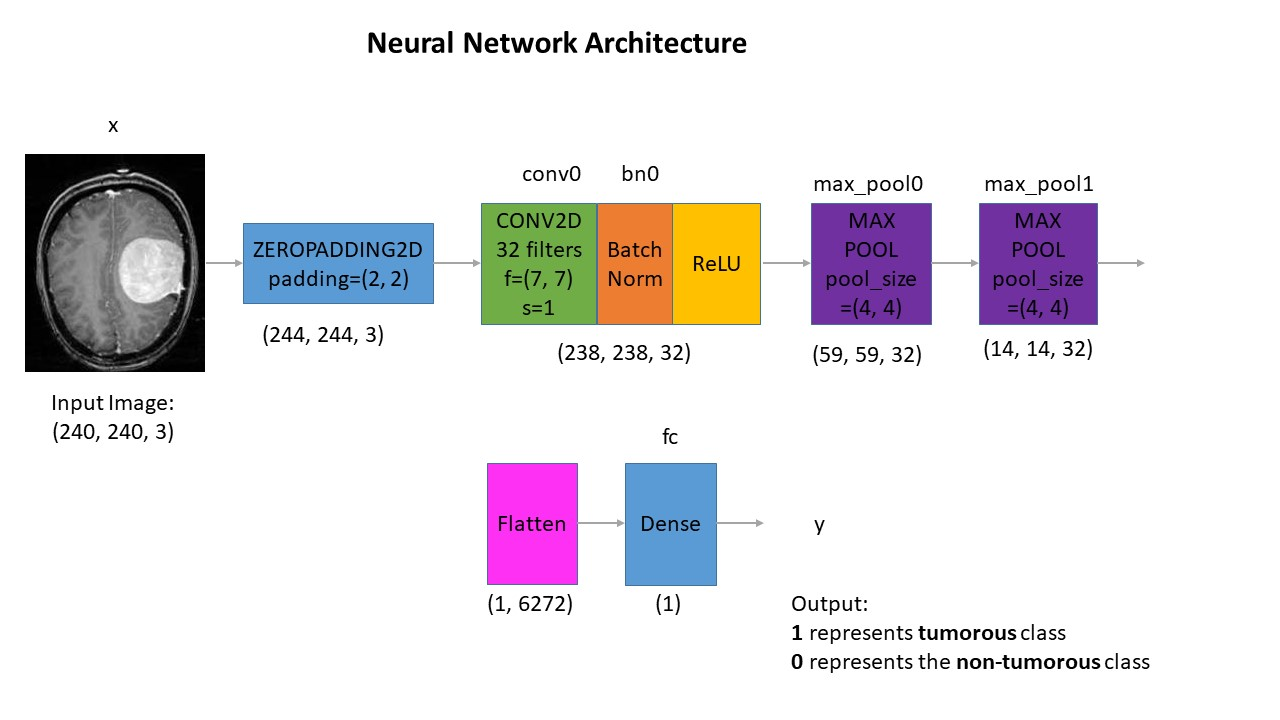

In [24]:
def build_model(input_shape):
    """
    Arugments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='BrainDetectionModel')
    
    return model


Define the image shape:

In [25]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
model = build_model(IMG_SHAPE)
model.summary()

Model: "BrainDetectionModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 244, 244, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 238, 238, 32)      4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 238, 238, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 238, 238, 32)      0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 59, 59, 32)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 14, 14, 32)


Compile the model:

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
# tensorboard
log_file_name = f'brain_tumor_detection_cnn_{int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs/{log_file_name}')

# checkpoint
# unique file name that will include the epoch and the validation (development) accuracy
filepath="cnn-parameters-improvement-{epoch:02d}-{val_accuracy:.2f}"
# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint("models/{}.model".format(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max'))

Train the model:

In [28]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/10
46/46 [==============================] - 127s 3s/step - loss: 0.8205 - accuracy: 0.5936 - val_loss: 0.6536 - val_accuracy: 0.6806
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.68.model/assets
Epoch 2/10
46/46 [==============================] - 124s 3s/step - loss: 0.4905 - accuracy: 0.7534 - val_loss: 0.6142 - val_accuracy: 0.6129
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.61.model/assets
Epoch 3/10
46/46 [==============================] - 124s 3s/step - loss: 0.4510 - accuracy: 0.8031 - val_loss: 0.5621 - val_accuracy: 0.7226
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.72.model/assets
Epoch 4/10
46/46 [==============================] - 123s 3s/step - loss: 0.3522 - accuracy: 0.8405 - val_loss: 0.5332 - val_accuracy: 0.7194
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-04-0.72.model/assets
Epoch 5/10
46/46 [==============================] - 123s 3s/step - loss: 0.2

In [29]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/3
46/46 [==============================] - 131s 3s/step - loss: 0.2292 - accuracy: 0.9052 - val_loss: 0.5014 - val_accuracy: 0.7871
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.79.model/assets
Epoch 2/3
46/46 [==============================] - 125s 3s/step - loss: 0.2319 - accuracy: 0.9010 - val_loss: 0.3423 - val_accuracy: 0.8613
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.86.model/assets
Epoch 3/3
46/46 [==============================] - 124s 3s/step - loss: 0.1823 - accuracy: 0.9329 - val_loss: 0.2802 - val_accuracy: 0.8968
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.90.model/assets
Elapsed time: 0:6:24.3


In [30]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/3
46/46 [==============================] - 124s 3s/step - loss: 0.1482 - accuracy: 0.9460 - val_loss: 0.3047 - val_accuracy: 0.8774
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.88.model/assets
Epoch 2/3
46/46 [==============================] - 124s 3s/step - loss: 0.1317 - accuracy: 0.9592 - val_loss: 0.5833 - val_accuracy: 0.7774
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.78.model/assets
Epoch 3/3
46/46 [==============================] - 129s 3s/step - loss: 0.1496 - accuracy: 0.9370 - val_loss: 0.3035 - val_accuracy: 0.8839
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.88.model/assets
Elapsed time: 0:6:21.4


In [31]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/3
46/46 [==============================] - 125s 3s/step - loss: 0.1243 - accuracy: 0.9599 - val_loss: 0.2890 - val_accuracy: 0.9032
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.90.model/assets
Epoch 2/3
46/46 [==============================] - 123s 3s/step - loss: 0.1232 - accuracy: 0.9606 - val_loss: 0.2873 - val_accuracy: 0.9065
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.91.model/assets
Epoch 3/3
46/46 [==============================] - 125s 3s/step - loss: 0.1473 - accuracy: 0.9467 - val_loss: 0.5329 - val_accuracy: 0.7935
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.79.model/assets
Elapsed time: 0:6:17.7


In [32]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=5, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/5
46/46 [==============================] - 124s 3s/step - loss: 0.0957 - accuracy: 0.9696 - val_loss: 0.2831 - val_accuracy: 0.8968
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.90.model/assets
Epoch 2/5
46/46 [==============================] - 124s 3s/step - loss: 0.0957 - accuracy: 0.9737 - val_loss: 0.2984 - val_accuracy: 0.8968
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.90.model/assets
Epoch 3/5
46/46 [==============================] - 124s 3s/step - loss: 0.1626 - accuracy: 0.9294 - val_loss: 0.3155 - val_accuracy: 0.8742
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.87.model/assets
Epoch 4/5
46/46 [==============================] - 124s 3s/step - loss: 0.0921 - accuracy: 0.9654 - val_loss: 0.3824 - val_accuracy: 0.8581
INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-04-0.86.model/assets
Epoch 5/5
46/46 [==============================] - 125s 3s/step - loss: 0.0853 -

In [33]:
history = model.history.history

In [34]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


## **Plot Loss & Accuracy**

In [46]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

**Note:** Since we trained the model using more than model.fit() function call, this made the history only contain the metric values of the epochs for the last call (which was for 5 epochs), so to plot the metric values across the whole process of trianing the model from the beginning, I had to grab the rest of the values.

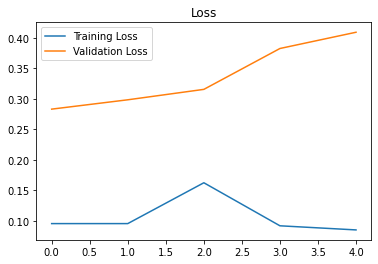

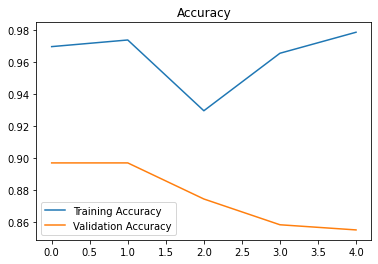

In [47]:
plot_metrics(history)

## **Results**
Let's experiment with the best model (the one with the best validation accuracy):

Concretely, the model at the 18th iteration with validation accuracy of 90.65%

**Load the best model**

In [38]:
best_model = load_model(filepath='models/cnn-parameters-improvement-05-0.85.model')
best_model.metrics_names


['loss', 'accuracy']

Evaluate the best model on the testing data:

In [39]:
loss, acc = best_model.evaluate(x=X_test, y=y_test)

10/10 [==============================] - 7s 680ms/step - loss: 0.4287 - accuracy: 0.8355


**Accuracy of the best model on the testing data:**

In [40]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.42872604727745056
Test Accuracy = 0.8354838490486145


**F1 score for the best model on the testing data:**

In [41]:
y_test_prob = best_model.predict(X_test)

f1score = compute_f1_score(y_test, y_test_prob)
print(f"F1 score: {f1score}")

F1 score: 0.8521739130434781


Let's also find the f1 score on the validation data:

In [42]:
y_val_prob = best_model.predict(X_val)

f1score_val = compute_f1_score(y_val, y_val_prob)
print(f"F1 score: {f1score_val}")

F1 score: 0.8760330578512396


**Results Interpretation :**

Let's remember the percentage of positive and negative examples:

In [43]:
def data_percentage(y):
    
    m=len(y)
    n_positive = np.sum(y)
    n_negative = m - n_positive
    
    pos_prec = (n_positive* 100.0)/ m
    neg_prec = (n_negative* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {n_positive}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {n_negative}")

In [44]:
# the whole data
data_percentage(y)

Number of examples: 2065
Percentage of positive examples: 52.54237288135593%, number of pos examples: 1085
Percentage of negative examples: 47.45762711864407%, number of neg examples: 980


In [45]:
print("Training Data:")
data_percentage(y_train)
print("Validation Data:")
data_percentage(y_val)
print("Testing Data:")
data_percentage(y_test)

Training Data:
Number of examples: 1445
Percentage of positive examples: 52.94117647058823%, number of pos examples: 765
Percentage of negative examples: 47.05882352941177%, number of neg examples: 680
Validation Data:
Number of examples: 310
Percentage of positive examples: 52.903225806451616%, number of pos examples: 164
Percentage of negative examples: 47.096774193548384%, number of neg examples: 146
Testing Data:
Number of examples: 310
Percentage of positive examples: 50.32258064516129%, number of pos examples: 156
Percentage of negative examples: 49.67741935483871%, number of neg examples: 154


## **Conclusion:**
Now, the model detects brain tumor with:
83.54% accuracy on the test set.
0.85 f1 score on the test set.
These resutls are very good considering that the data is balanced.

**Performance Table:**

          Validation set	Test set
Accuracy--------90.6%------83.54%

F1 score--------0.87----------0.85



Hooray!